[I 2025-02-28 15:26:52,650] A new study created in memory with name: no-name-5dbc39c4-0dfa-4f9e-a0a1-063597edf7c8
[I 2025-02-28 15:26:55,457] Trial 0 finished with value: 0.23875901103019714 and parameters: {'learning_rate': 0.00010739489721841065, 'batch_size': 28, 'd_model': 64, 'nhead': 4, 'num_layers': 2}. Best is trial 0 with value: 0.23875901103019714.
[I 2025-02-28 15:26:57,010] Trial 1 finished with value: 0.28696128726005554 and parameters: {'learning_rate': 0.0003599162543571576, 'batch_size': 42, 'd_model': 32, 'nhead': 2, 'num_layers': 3}. Best is trial 0 with value: 0.23875901103019714.
[I 2025-02-28 15:27:04,048] Trial 2 finished with value: 0.1774473339319229 and parameters: {'learning_rate': 0.00018844221126717287, 'batch_size': 22, 'd_model': 128, 'nhead': 2, 'num_layers': 3}. Best is trial 2 with value: 0.1774473339319229.
[I 2025-02-28 15:27:08,950] Trial 3 finished with value: 0.2140003740787506 and parameters: {'learning_rate': 0.00035317736483876964, 'batch_size':

Epoch 0, Loss: 1.1157253980636597
Epoch 10, Loss: 0.5558012127876282
Epoch 20, Loss: 0.24512669444084167
Epoch 30, Loss: 0.17378561198711395
Epoch 40, Loss: 0.10279519110918045
Epoch 50, Loss: 0.0688692033290863
Epoch 60, Loss: 0.05379931628704071
Epoch 70, Loss: 0.04303973168134689
Epoch 80, Loss: 0.022929580882191658
Epoch 90, Loss: 0.01861407980322838
Epoch 100, Loss: 0.025880873203277588
Epoch 110, Loss: 0.008377238176763058
Epoch 120, Loss: 0.01763906329870224
Epoch 130, Loss: 0.017368221655488014
Epoch 140, Loss: 0.009336458519101143
Epoch 150, Loss: 0.010710258036851883
Epoch 160, Loss: 0.013955218717455864
Epoch 170, Loss: 0.01109760720282793
Epoch 180, Loss: 0.010605370625853539
Epoch 190, Loss: 0.006888896226882935
Epoch 200, Loss: 0.00955620314925909
Epoch 210, Loss: 0.008433666080236435
Epoch 220, Loss: 0.007227672263979912
Epoch 230, Loss: 0.006618900690227747
Epoch 240, Loss: 0.006183250807225704
Epoch 250, Loss: 0.0057808407582342625
Epoch 260, Loss: 0.007019178941845894

D:\Comsol\ipykernel_19820\1846758385.py:136: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


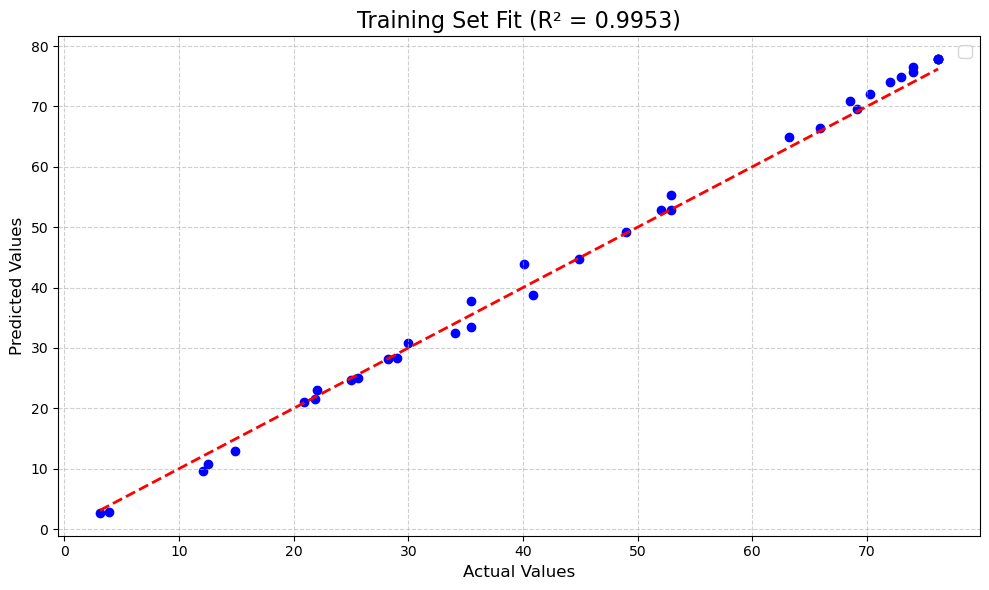

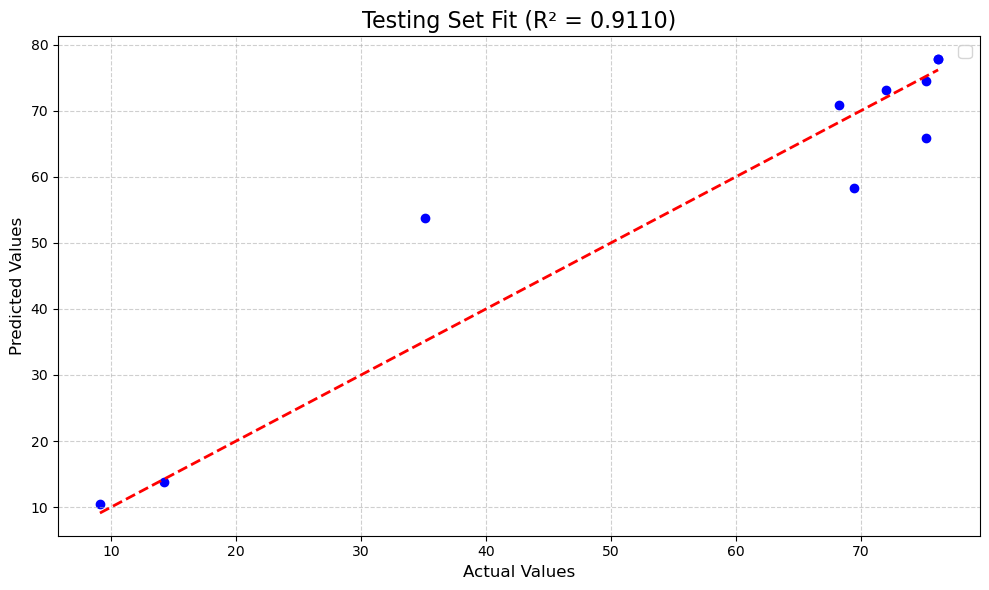

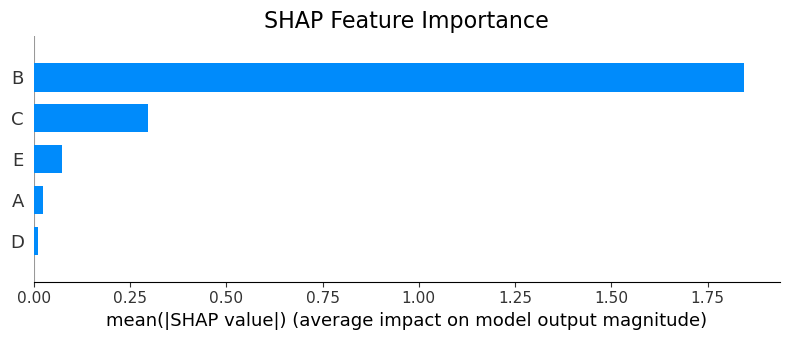

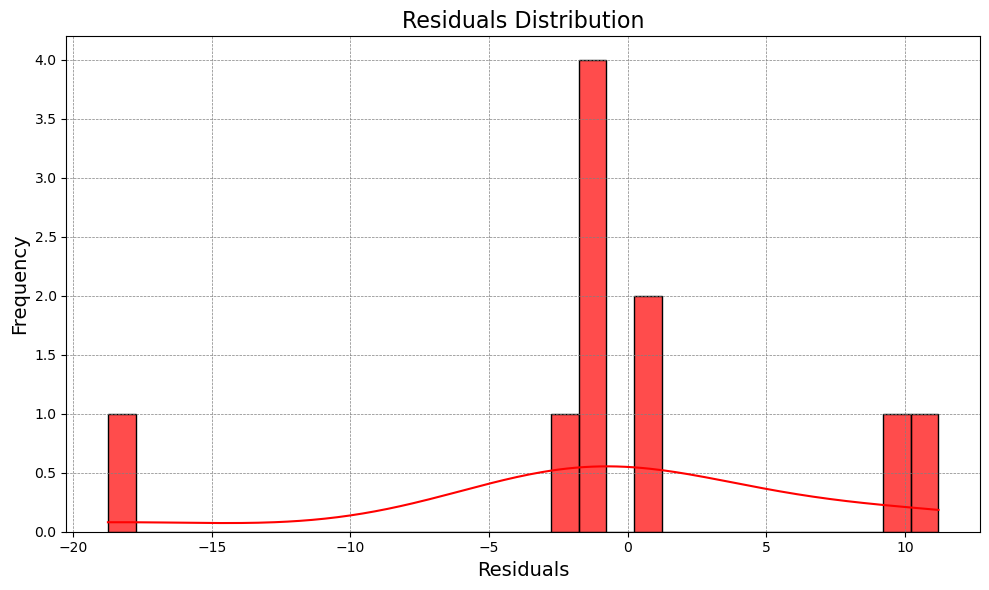

[I 2025-02-28 15:27:40,761] A new study created in memory with name: no-name-ed93efb5-b31f-4f5c-ac62-a269ec1cdb07
[I 2025-02-28 15:27:40,767] Trial 0 finished with value: -1.1691447496414185 and parameters: {'A': 179.4077124777089, 'B': 7.779850555385013, 'C': 449.41749298593584, 'D': 384.7895638498891, 'E': 476.4559161687074}. Best is trial 0 with value: -1.1691447496414185.
[I 2025-02-28 15:27:40,772] Trial 1 finished with value: -1.1829856634140015 and parameters: {'A': 182.11169355050438, 'B': 6.977207688784091, 'C': 550.0343064446018, 'D': 386.8408132431172, 'E': 514.5691211902538}. Best is trial 1 with value: -1.1829856634140015.
[I 2025-02-28 15:27:40,776] Trial 2 finished with value: -1.18643057346344 and parameters: {'A': 112.77775038103971, 'B': 3.8645584817334093, 'C': 587.1048991726134, 'D': 597.80180838335, 'E': 402.456474390512}. Best is trial 2 with value: -1.18643057346344.
[I 2025-02-28 15:27:40,781] Trial 3 finished with value: -1.1652952432632446 and parameters: {'A'

Best parameters found:  {'A': 143.28518431563543, 'B': 6.629906205172974, 'C': 621.2754230303099, 'D': 536.1788252989604, 'E': 418.49533911442023}
Best predicted function value:  1.1971908807754517


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import optuna
from itertools import combinations
import shap

file_path = '论文数据 - 副本.xlsx'
data = pd.read_excel(file_path)

X = data.iloc[:, 1:6].values
y = data.iloc[:, 6].values

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers):
        super(TransformerModel, self).__init__()
        self.input_fc = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_fc = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.input_fc(x)
        x = x.unsqueeze(1)  
        x = self.transformer_encoder(x)
        x = x.squeeze(1)
        x = self.output_fc(x)
        return x
def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_int('batch_size', 16, 64)
    
    # 确保 d_model 能被 nhead 整除
    d_model = trial.suggest_categorical('d_model', [32, 64, 128])  # 可选值必须是 nhead 的倍数
    nhead = trial.suggest_categorical('nhead', [2, 4, 8])  # 可选值必须能整除 d_model
    
    if d_model % nhead != 0:
        raise ValueError(f"d_model ({d_model}) must be divisible by nhead ({nhead})")
    
    num_layers = trial.suggest_int('num_layers', 1, 3)

    model = TransformerModel(input_dim=X_train.shape[1], d_model=d_model, nhead=nhead, num_layers=num_layers)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.train()
    for epoch in range(100):
        permutation = torch.randperm(X_train.size()[0])
        for i in range(0, X_train.size()[0], batch_size):
            indices = permutation[i:i + batch_size]
            batch_X, batch_y = X_train[indices], y_train[indices]

            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = mean_squared_error(y_test.numpy(), y_pred.numpy())
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

best_model = TransformerModel(
    input_dim=X_train.shape[1],
    d_model=study.best_params['d_model'],
    nhead=study.best_params['nhead'],
    num_layers=study.best_params['num_layers']
)

criterion = nn.MSELoss()
optimizer = optim.Adam(best_model.parameters(), lr=study.best_params['learning_rate'])

best_model.train()
for epoch in range(400):
    permutation = torch.randperm(X_train.size()[0])
    for i in range(0, X_train.size()[0], study.best_params['batch_size']):
        indices = permutation[i:i + study.best_params['batch_size']]
        batch_X, batch_y = X_train[indices], y_train[indices]

        outputs = best_model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')


best_model.eval()
with torch.no_grad():
    y_train_pred = best_model(X_train).numpy()
    y_test_pred = best_model(X_test).numpy()

y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train = scaler_y.inverse_transform(y_train.numpy())
y_test = scaler_y.inverse_transform(y_test.numpy())

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

def plot_fit(actual, predicted, title, r2):
    plt.figure(figsize=(10, 6))
    plt.scatter(actual, predicted, color='blue')
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--', linewidth=2)
    plt.title(title + f" (R² = {r2:.4f})", fontsize=16)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_fit(y_train, y_train_pred, "Training Set Fit", train_r2)
plot_fit(y_test, y_test_pred, "Testing Set Fit", test_r2)

class ShapModel:
    def __init__(self, model, scaler_X, scaler_y):
        self.model = model
        self.scaler_X = scaler_X
        self.scaler_y = scaler_y

    def predict(self, X):
        X_tensor = torch.tensor(self.scaler_X.transform(X), dtype=torch.float32)
        with torch.no_grad():
            preds = self.model(X_tensor).numpy()
        return self.scaler_y.inverse_transform(preds)

shap_model = ShapModel(best_model, scaler_X, scaler_y)
explainer = shap.Explainer(shap_model.predict, scaler_X.transform(X[:100]))
shap_values = explainer(scaler_X.transform(X_train[:100]))

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train[:100], feature_names=data.columns[1:6], plot_type="bar", show=False)
plt.title('SHAP Feature Importance', fontsize=16)
plt.tight_layout()
plt.show()

residuals = y_test.flatten() - y_test_pred.flatten()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='red', alpha=0.7)
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()
def objective(trial):
    A = trial.suggest_float('A', 6, 200)
    B = trial.suggest_float('B', 1.5, 10)
    C = trial.suggest_float('C', 300, 700)
    D = trial.suggest_float('D', 120, 700)
    E = trial.suggest_float('E', 400, 600)
    
    x = np.array([[A, B, C, D, E]])
    x_scaled = scaler_X.transform(x)
    x_tensor = torch.tensor(x_scaled, dtype=torch.float32)
    
    with torch.no_grad():
        prediction = best_model(x_tensor).item()
    return -prediction

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_value = -study.best_value

print("Best parameters found: ", best_params)
print("Best predicted function value: ", best_value)
